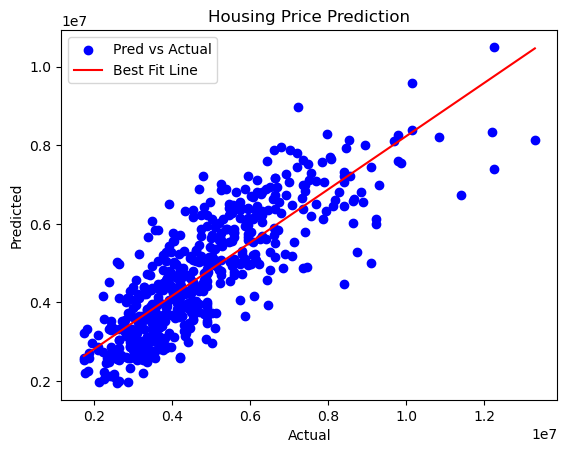

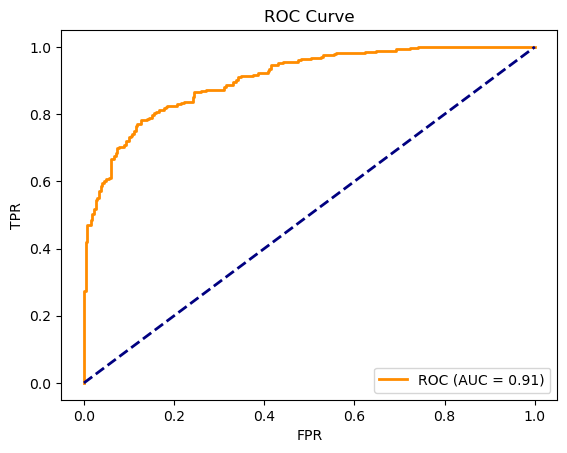

AUC: 0.9053737373737373


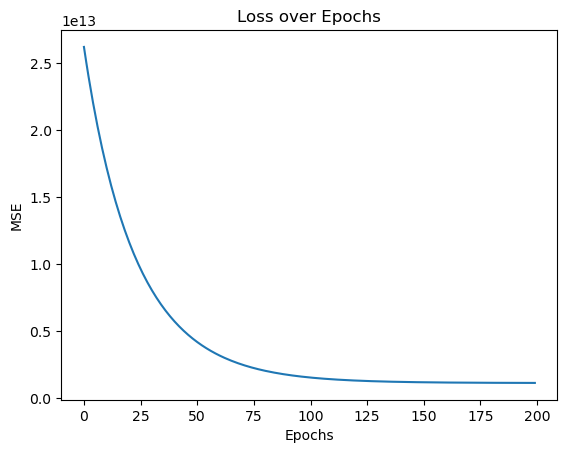

In [31]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as L, StandardScaler as S
from sklearn.metrics import roc_curve as r, auc as a
d = p.read_csv("Housing.csv")
c = ['mainroad','guestroom','basement','hotwaterheating',
     'airconditioning','prefarea','furnishingstatus']
for col in c:
    l = L()
    d[col] = l.fit_transform(d[col])
X = d.drop("price", axis=1).values.astype(float)
y = d["price"].values.astype(float).reshape(-1,1)
s = S()
X = s.fit_transform(X)
class M:
    def __init__(self, k):
        self.w = n.random.randn(k,1)
        self.b = n.random.randn(1)
    def f(self, X):
        return X.dot(self.w) + self.b
    def t(self, X, y, lr=1e-2, e=200):
        l = []
        for _ in range(e):
            yp = self.f(X)
            loss = n.mean((y - yp)**2)
            l.append(loss)
            dw = -2 * X.T.dot(y - yp) / len(y)
            db = -2 * n.mean(y - yp)
            self.w -= lr * dw
            self.b -= lr * db
        return l
m = M(X.shape[1])
l = m.t(X, y, lr=1e-2, e=200)
yp = m.f(X)
plt.scatter(y, yp, color='blue', label='Pred vs Actual')
aa, bb = n.polyfit(y.ravel(), yp.ravel(), 1)
plt.plot(y, aa*y + bb, color='red', label='Best Fit Line')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Housing Price Prediction")
plt.legend()
plt.show()
yb = (y >= n.median(y)).astype(int).ravel()
ys = yp.ravel()
fpr, tpr, _ = r(yb, ys)
roc_auc = a(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.show()
print("AUC:", roc_auc)
plt.plot(l)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
